In [24]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))

# Load dataframes

In [25]:
df_movies = pd.read_csv('data/processed/movies.csv')
# df_movies.head()
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81740 entries, 0 to 81739
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wikipedia movie ID  81740 non-null  int64  
 1   Freebase ID         81740 non-null  object 
 2   Movie name          81740 non-null  object 
 3   Release date        74838 non-null  object 
 4   Box office revenue  8400 non-null   float64
 5   Runtime             61290 non-null  float64
 6   Languages           81740 non-null  object 
 7   Countries           81740 non-null  object 
 8   Genres              81740 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


Notice we are missing information for 'Release Date', 'Box Office Revenue', and 'Runtime', 

In [26]:
df_characters = pd.read_csv('data/processed/characters.csv')
df_characters.head()
df_characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450668 entries, 0 to 450667
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               450668 non-null  int64  
 1   Freebase movie ID                450668 non-null  object 
 2   Movie release date               440673 non-null  object 
 3   Character name                   192793 non-null  object 
 4   Actor DoB                        344523 non-null  object 
 5   Actor gender                     405059 non-null  object 
 6   Actor height (m)                 154823 non-null  float64
 7   Actor ethnicity (Freebase ID)    106058 non-null  object 
 8   Actor name                       449440 non-null  object 
 9   Actor age at movie release       292555 non-null  float64
 10  Freebase character/actor map ID  450668 non-null  object 
 11  Freebase character ID            192803 non-null  object 
 12  Fr

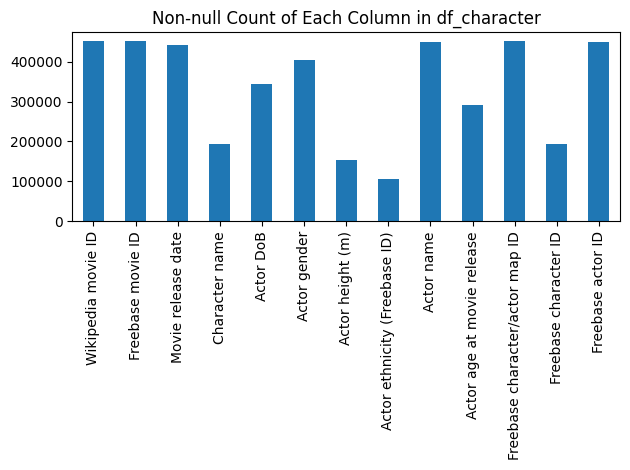

In [27]:
# plt.figure(figsize=(12, 6))
df_characters.count().plot(kind='bar')
plt.title('Non-null Count of Each Column in df_character')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
df_plots = pd.read_csv('data/processed/plot_summaries.csv')
df_plots.head()
df_plots.shape

(42302, 2)

In [29]:
# merge movie metadata and plots 
df_movies_summaries = pd.merge(df_movies, df_plots, on='Wikipedia movie ID')
df_movies_summaries.head()
df_movies_summaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42202 entries, 0 to 42201
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wikipedia movie ID  42202 non-null  int64  
 1   Freebase ID         42202 non-null  object 
 2   Movie name          42202 non-null  object 
 3   Release date        39584 non-null  object 
 4   Box office revenue  7586 non-null   float64
 5   Runtime             35578 non-null  float64
 6   Languages           42202 non-null  object 
 7   Countries           42202 non-null  object 
 8   Genres              42202 non-null  object 
 9   Summary             42202 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.2+ MB


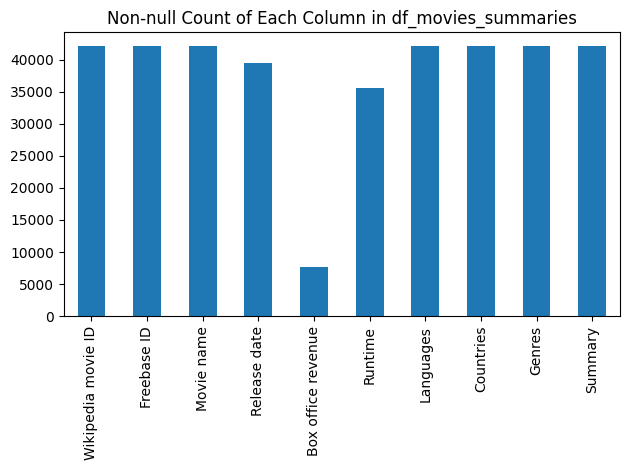

In [30]:
df_movies_summaries.count().plot(kind='bar')
plt.title('Non-null Count of Each Column in df_movies_summaries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Preprocessing - Data Distributions 

In [31]:
from src.data.process_data import *

## Movies 
### Languages

In [32]:
df_movies["Lang names"] = df_movies["Languages"].apply(extract_tuples_values)
df_movies["Lang names"].head()

0                 [English Language]
1               [Norwegian Language]
2                 [English Language]
3                  [German Language]
4    [Silent film, English Language]
Name: Lang names, dtype: object

In [33]:

import re
def clean_languages(s):
    s = re.sub(r'(?i)languages?','',str(s))
    return s
df_movies["Lang names"] = df_movies["Lang names"].apply(clean_languages)


In [34]:
print('There are {} different languages'.format(len(df_movies["Lang names"].unique())))



There are 1817 different languages


### Release dates

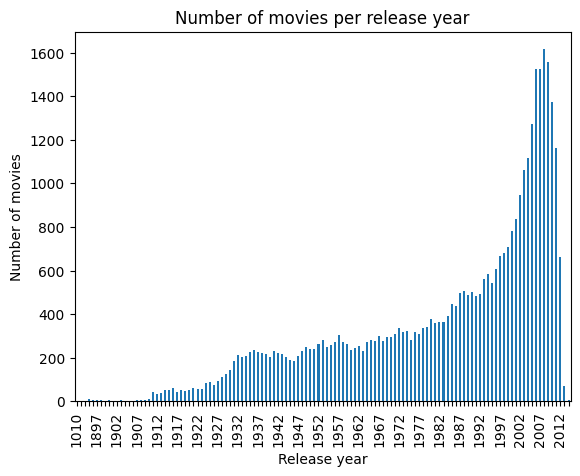


Number of movies per year:
Release date
1010       1
1893       1
1894       2
1895       9
1896       6
        ... 
2010    1374
2011    1162
2012     662
2013      70
2014       4
Length: 123, dtype: int64


In [35]:
def extract_year(date_string):
    # Find all 4-digit numbers in the string
    years = re.findall(r'\b\d{4}\b', str(date_string))
    # Return the first match if found, otherwise return None
    return years[0] if years else None

df_movies_summaries['Release date'] = df_movies_summaries['Release date'].apply(extract_year)
df_movies_summaries.groupby('Release date').size().plot(kind='bar')
# Get current axis
ax = plt.gca()

# Show only every 10th tick
n = 5  # Show ticks every n years
ticks = ax.xaxis.get_ticklabels()
for i, tick in enumerate(ticks):
    if i % n != 0:
        tick.set_visible(False)

plt.title('Number of movies per release year')
plt.xlabel('Release year')
plt.ylabel('Number of movies')


plt.show()
print("\nNumber of movies per year:")
print(df_movies_summaries.groupby('Release date').size())

In [36]:
 df_movies_summaries[df_movies_summaries['Release date'] == '1946']

,Wikipedia movie ID,Freebase ID,Movie name,Release date,Box office revenue,Runtime,Languages,Countries,Genres,Summary
460,7544443,/m/0kvb4f,Tomorrow is Forever,1946,NaN,105.0,"{""/m/04306rv"": ""German Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America""}","{""/m/01lrrt"": ""Melodrama"", ""/m/07s9rl0"": ""Dram...",The movie tells the story of Elizabeth and Jo...
485,6352213,/m/0g26jx,Hare Remover,1946,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/0hqxf"": ""Famil...","Elmer tries his best to make a ""Jekyll and Hyd..."
673,2332364,/m/074dk4,The Strange Love of Martha Ivers,1946,NaN,116.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01lrrt"": ""Me...",On a rainy night in 1928 in a Pennsylvania fac...
768,10387789,/m/02qb69b,The Secret Heart,1946,NaN,97.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01g6gs"": ""Black-an...","Lee is engaged to marry Larry Adams, a spendth..."
989,7725707,/m/0kvg39,Deception,1946,NaN,112.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...",Christine Radcliffe runs up the stairs of a c...
...,...,...,...,...,...,...,...,...,...,...
41734,3585135,/m/09n3z1,Undercurrent,1946,NaN,116.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",Ann Hamilton is a middle-aged bride who begin...
41942,1226363,/m/04k1hd,Beauty and the Beast,1946,NaN,93.0,"{""/m/064_8sq"": ""French Language""}","{""/m/0f8l9c"": ""France""}","{""/m/02n4lw"": ""Art film"", ""/m/03q4nz"": ""World ...","While scrubbing the floor at home, Belle is i..."
42024,8004497,/m/026n72t,Rhythm and Weep,1946,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/01z4y"": ""Comed...",The Stooges play the roles of unsuccessful ac...
42156,2238130,/m/06y9rw,Crack-Up,1946,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/09blyk"": ""Psycho...",Art critic and forgery expert George Steele i...


{'off', 'because', 'myself', 'do', 'over', 'his', 'down', 'hers', "shouldn't", 'of', 'shouldn', "mustn't", 'being', 'and', 'for', 'won', 'll', 'yours', 'below', 'ours', 'from', "hasn't", 'm', 'am', "couldn't", 'own', 'can', 'these', 'whom', 'me', "you're", 'after', 'aren', "doesn't", "shan't", 'wasn', 'isn', 'between', 'other', 'at', 'again', 'its', "won't", 'as', 'only', 'out', 'nor', "aren't", 'very', 'an', 'if', 'doesn', 'had', 'mightn', 'didn', 'was', "needn't", "wasn't", 'is', 'it', 'ain', 'herself', 'so', 'against', 'theirs', 'him', 'our', 'through', 'couldn', 'those', 'mustn', 'in', "should've", "haven't", 't', 'few', 'her', 'themselves', 'there', "didn't", 'the', 'up', 'which', 'no', 'where', 'until', 'both', 'about', "isn't", "you've", 'yourself', 'were', 'all', 'before', 'don', 'such', 'haven', 'we', "you'd", 'same', 'yourselves', "weren't", 'by', 'd', 'more', 'y', 'you', 'while', 'has', 'to', "don't", 'who', 'my', 'are', 'be', 'them', 'each', 's', 'then', 'with', 're', 'on',

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charlottemeyer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


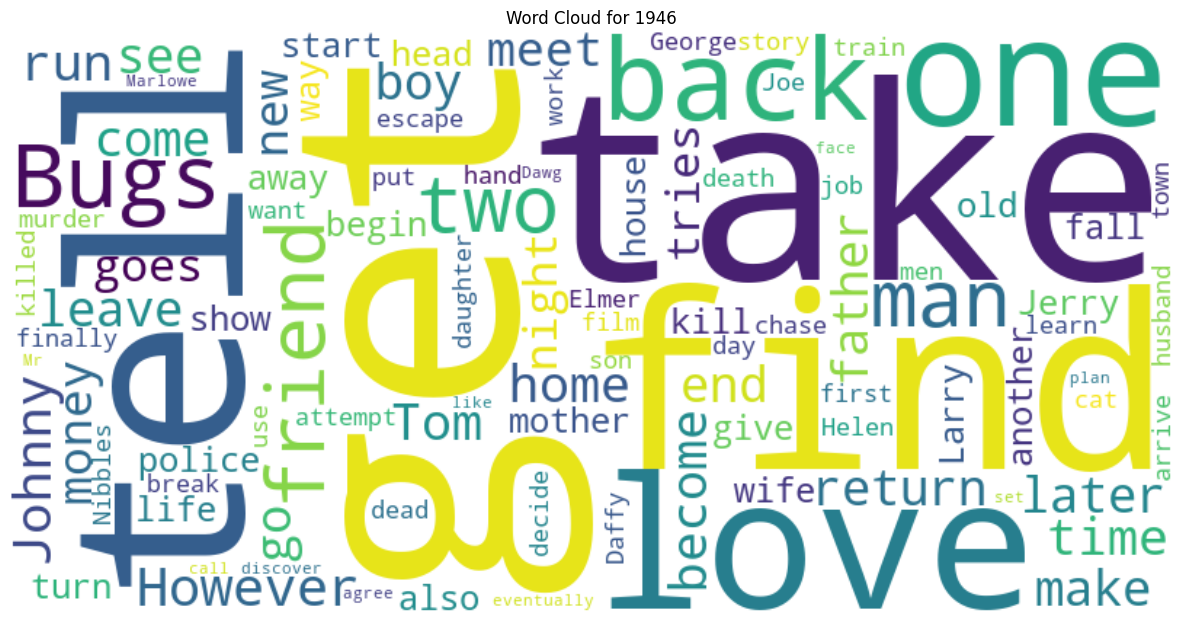

In [37]:
from wordcloud import WordCloud
import nltk  # Note the spelling: nltk, not ntlk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')  
stop_words = set(stopwords.words("english"))  


print(stop_words)
def create_wordcloud(text):
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        stopwords=stop_words,
        max_words=100
    ).generate(text)
    
    return wordcloud

def plot_wordcloud_for_year(year):
    year_texts = df_movies_summaries[df_movies_summaries['Release date'] == year]['Summary'].str.cat(sep=' ')
    
    if not year_texts:
        print(f"No movies found for year {year}")
        return
    
    # Create wordcloud
    wordcloud = create_wordcloud(year_texts)
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {year}')
    plt.show()

plot_wordcloud_for_year('1946')  # Change year here


ACTORS

In [38]:
df_movies_characters = df_movies.merge(df_characters, on='Wikipedia movie ID')
df_movies_characters.head()



,Wikipedia movie ID,Freebase ID,Movie name,Release date,Box office revenue,Runtime,Languages,Countries,Genres,Lang names,...,Character name,Actor DoB,Actor gender,Actor height (m),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",['English '],...,Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",['English '],...,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm
2,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",['English '],...,NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh
3,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",['English '],...,NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb
4,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",['English '],...,FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5


In [39]:
df_movies_characters["Genres"] = df_movies_characters["Genres"].apply(extract_tuples_values)
# df_movies_characters["Genres"].head()

In [40]:
df_movies_characters["Genres"].head()

0    [Mystery, Biographical film, Drama, Crime Drama]
1    [Mystery, Biographical film, Drama, Crime Drama]
2    [Mystery, Biographical film, Drama, Crime Drama]
3    [Mystery, Biographical film, Drama, Crime Drama]
4    [Mystery, Biographical film, Drama, Crime Drama]
Name: Genres, dtype: object

In [41]:
ethnicity_by_year = df_movies_characters.groupby(['Release date','Actor ethnicity (Freebase ID)']).size()
ethnicity_by_year.head()

Release date  Actor ethnicity (Freebase ID)
1891          /m/03lmx1                        1
1894          /m/03lmx1                        1
1896-09       /m/063k3h                        1
1900          /m/041rx                         1
1901          /m/063k3h                        1
dtype: int64

### Genres
### Release dates
### Runtimes 
### Box office revenues
### Countries 
## Actors 
### Gender
### Ages (DoB and age during movie) 
### Ethnicity 
### Height?

# Preprocessing - Cleaning 

In [42]:
df_movies_summaries.head()

,Wikipedia movie ID,Freebase ID,Movie name,Release date,Box office revenue,Runtime,Languages,Countries,Genres,Summary
0,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
1,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."
2,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns..."
3,6631279,/m/0gffwj,Little city,1997,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a..."
4,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...


In [43]:
df_movies_summaries['Summary'].head()

0    A series of murders of rich young women throug...
1    Eva, an upper class housewife, becomes frustra...
2    Every hundred years, the evil Morgana  returns...
3    Adam, a San Francisco-based artist who works a...
4    {{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
Name: Summary, dtype: object

In [44]:
df_movies_summaries['Summary'] = df_movies_summaries['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_movies_summaries['Summary']

0        A series murders rich young women throughout A...
1        Eva, upper class housewife, becomes frustrated...
2        Every hundred years, evil Morgana returns clai...
3        Adam, San Francisco-based artist works cab dri...
4        {{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
                               ...                        
42197    {{plot}} The film opens Great Western express ...
42198    Two former National Oceanic Atmospheric Admini...
42199    {{No plot}} This film follows 12 years lives 3...
42200    The story takes place year 2092,The Super Dime...
42201    The movie teenage girl loves horror movies wat...
Name: Summary, Length: 42202, dtype: object